In [1]:
import pandas as pd
import numpy as nd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\DELL\Downloads\train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()
#basic data understanding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [5]:
#convert text into numbers
data['Sex']=data['Sex'].map({'male':0,'female':1})

In [6]:
input_features=data[['Pclass','Sex','Age','Fare']]
target_variables=data['Survived']

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(input_features, target_variables, test_size=0.2, random_state=42)

In [16]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(max_iter=200)
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [17]:
Predictions=model.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_test,Predictions)
print("model accuracy:",accuracy)

model accuracy: 0.8044692737430168


In [20]:
print("conclusion graph")


conclusion graph


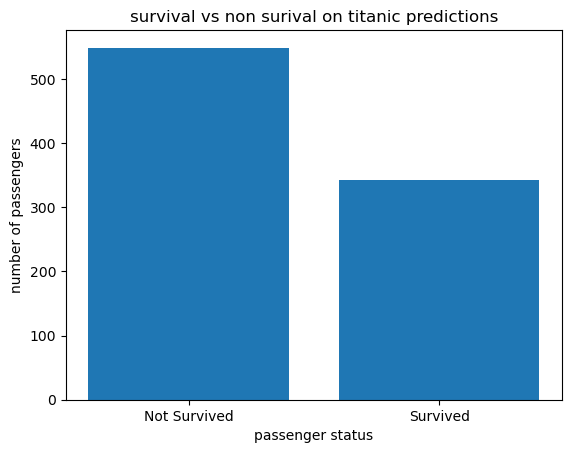

In [23]:
survival_counts=data['Survived'].value_counts()

plt.figure()
plt.bar(['Not Survived','Survived'],survival_counts)
plt.xlabel('passenger status')
plt.ylabel('number of passengers')
plt.title("survival vs non surival on titanic predictions")
plt.show()